In [1]:
# <1> 
# Import libraries

#(Write code here)
import pandas as pd
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply
import os

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder
cur_dir=os.getcwd();
print(cur_dir);

/work


In [3]:
print(os.listdir(cur_dir));#listing my current directory items

['MERGED2008_09_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2014_15_PP.csv', 'untitled.ipynb', 'MERGED2005_06_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2012_13_PP.csv', 'data.yaml', 'notebook.ipynb', 'MERGED1999_00_PP.csv', 'MERGED2018_19_PP.csv', 'MERGED2006_07_PP.csv', 'init.ipynb', 'MERGED2007_08_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2004_05_PP.csv', 'DATA-690-WANG', '.deepnote', 'MERGED2015_16_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED1996_97_PP.csv', 'Crosswalks.zip', 'Most-Recent-Cohorts-All-Data-Elements.csv', 'MERGED2002_03_PP.csv', 'MERGED1997_98_PP.csv']


In [4]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

merged_files = [i for i in os.listdir(cur_dir) if 'MERGED' in i]
merged_files

['MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED1997_98_PP.csv']

In [5]:
col_list = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
dfs = []
for i in merged_files:
    df = pd.read_csv(i, usecols=col_list)
    df['YEAR'] = i[6:10]
    dfs.append(df)
data_conct = pd.concat(dfs, axis=0, ignore_index=True)

In [6]:
data_conct.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,2008
1,100654,Alabama A & M University,AL,5.0,0.4900,4072.0,2008
2,100663,University of Alabama at Birmingham,AL,5.0,0.8510,4664.0,2008
3,100690,Amridge University,AL,5.0,NaN,6600.0,2008
4,100706,University of Alabama in Huntsville,AL,5.0,0.8917,5952.0,2008


In [7]:
data_conct.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
56166,413945,Toni & Guy Hairdressing Academy-Atlanta,GA,5.0,NaN,NaN,1998
56151,413680,Spartan College of Aeronautics & Technology,CA,8.0,NaN,NaN,1998
148530,364636,Portage Lakes Career Center,OH,3.0,NaN,NaN,1996
13637,485591,New Beginnings Beauty Academy,AR,5.0,NaN,NaN,2016
17247,199111,University of North Carolina at Asheville,NC,5.0,0.7314,4330.0,2009
135316,119605,National University,CA,8.0,NaN,12096.0,2013
91862,17706533,Columbia College - Mesquite,TX,6.0,NaN,8400.0,2018
114119,112312,Cleveland Chiropractic College of Los Angeles,CA,8.0,NaN,13306.0,2004
123221,199023,Montgomery Community College,NC,5.0,NaN,2409.0,2015
150963,145433,Hair Professionals School of Cosmetology,IL,3.0,0.8205,NaN,2002


In [8]:
data_conct.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
163326,432418,MANHATTAN BEAUTY SCHOOL,FL,5.0,NaN,NaN,1997
163327,432436,COOPER CAREER INSTITUTE,VA,5.0,NaN,NaN,1997
163328,432445,OCCUPATIONAL TRAINING CENTER,AZ,6.0,NaN,NaN,1997
163329,432472,ABC SPA CITY BEAUTY AND BARBER COLLEGE,AR,5.0,NaN,NaN,1997
163330,432524,Delaware College of Art and Design,DE,2.0,NaN,NaN,1997


In [9]:
data_conct.shape

(163331, 7)

In [10]:
data_conct.isna().any()

UNITID           False
INSTNM           False
STABBR           False
REGION            True
ADM_RATE          True
TUITIONFEE_IN     True
YEAR             False
dtype: bool

In [11]:
data_conct.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,163330.000000,44912.000000,79195.000000
mean,9.432395e+05,4.554693,0.692951,11665.636871
std,4.571721e+06,2.189217,0.217058,9986.003542
min,1.006360e+05,0.000000,0.000000,0.000000
25%,1.633380e+05,3.000000,0.555075,3776.000000
50%,2.127800e+05,5.000000,0.717500,9285.000000
75%,4.075680e+05,6.000000,0.857100,16148.000000
max,4.914640e+07,9.000000,1.000000,74787.000000


In [12]:
umbc_df = data_conct.loc[data_conct['INSTNM'] == 'University of Maryland-Baltimore County'].reset_index(drop=True)

In [13]:
umbc_df.shape

(23, 7)

In [14]:
umbc_df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [15]:
umbc_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008
1,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
2,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
3,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
4,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001


In [16]:
umbc_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
18,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
19,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
20,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
21,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
22,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997


In [17]:
umbc_df.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
8,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010
1,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
19,163268,University of Maryland-Baltimore County,MD,2.0,0.6315,10068.0,2013
2,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
11,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
3,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
13,163268,University of Maryland-Baltimore County,MD,2.0,0.7153,8622.0,2006
18,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
9,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
20,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996


In [18]:
umbc_df.isna().any()

UNITID           False
INSTNM           False
STABBR           False
REGION           False
ADM_RATE          True
TUITIONFEE_IN     True
YEAR             False
dtype: bool

In [19]:
umbc_df.describe()

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.0,23.0,18.000000,19.000000
mean,163268.0,2.0,0.640694,9004.842105
std,0.0,0.0,0.052728,1825.795421
min,163268.0,2.0,0.568300,5490.000000
25%,163268.0,2.0,0.597600,8270.000000
50%,163268.0,2.0,0.632100,8872.000000
75%,163268.0,2.0,0.689375,10226.000000
max,163268.0,2.0,0.717400,11778.000000


Text(0.5, 1.0, 'Bar plot of UMBC instate tuition fee against each year')

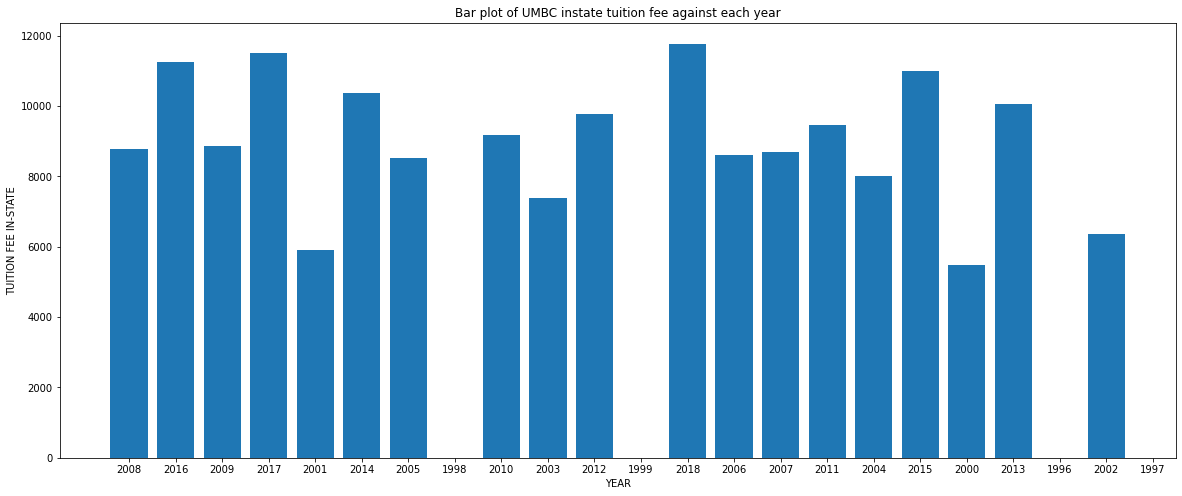

In [20]:
plt.figure(figsize=(20,8))
plt.bar(x='YEAR', height='TUITIONFEE_IN', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('TUITION FEE IN-STATE')
plt.title('Bar plot of UMBC instate tuition fee against each year')

Text(0.5, 1.0, 'Line plot of UMBC instate tuition fee against each year')

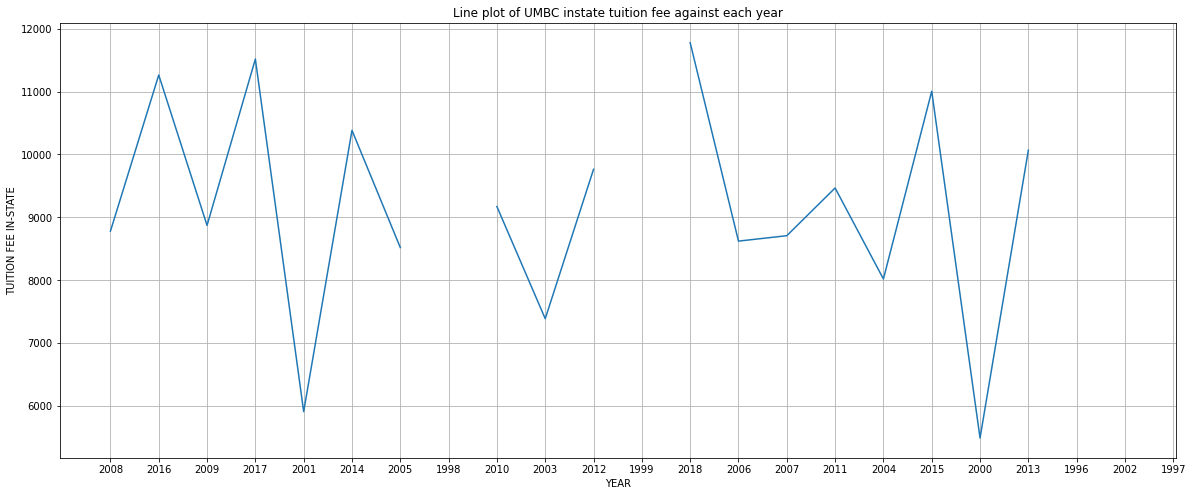

In [21]:
plt.figure(figsize=(20,8))
plt.grid()
plt.plot('YEAR', 'TUITIONFEE_IN', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('TUITION FEE IN-STATE')
plt.title('Line plot of UMBC instate tuition fee against each year')

In [22]:
lst_tuti = umbc_df['TUITIONFEE_IN'].to_list() # List with only the UMBC tuition fee over the years 1996-2019
lst_tuti

[8780.0,
 11264.0,
 8872.0,
 11518.0,
 5910.0,
 10384.0,
 8520.0,
 nan,
 9171.0,
 7388.0,
 9764.0,
 nan,
 11778.0,
 8622.0,
 8708.0,
 9467.0,
 8020.0,
 11006.0,
 5490.0,
 10068.0,
 nan,
 6362.0,
 nan]

In [23]:
temp_Series = pd.Series(lst_tuti) # Creating a series
changes = temp_Series.pct_change()*100 #pct_change() returns percentage change from before and after values
changes = changes.to_list() #Converts from series to list
changes #The percentage changes list

[nan,
 28.291571753986332,
 -21.23579545454546,
 29.824165915238954,
 -48.68900850842161,
 75.70219966159053,
 -17.950693374422187,
 0.0,
 7.640845070422531,
 -19.44171846036419,
 32.160259880887935,
 0.0,
 20.626792298238428,
 -26.79572083545594,
 0.9974483878450568,
 8.716123105190633,
 -15.28467307489173,
 37.23192019950125,
 -50.11811739051426,
 83.3879781420765,
 0.0,
 -36.809694080254275,
 0.0]

In [24]:
my_formatted_list = [round(i, 2) for i in changes ] # Rounding off to 2 decimals
my_formatted_list

[nan,
 28.29,
 -21.24,
 29.82,
 -48.69,
 75.7,
 -17.95,
 0.0,
 7.64,
 -19.44,
 32.16,
 0.0,
 20.63,
 -26.8,
 1.0,
 8.72,
 -15.28,
 37.23,
 -50.12,
 83.39,
 0.0,
 -36.81,
 0.0]

In [25]:
umbc_df['PCT_CHANGE'] = my_formatted_list # Inserting values to column PCT_CHANGE
umbc_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,163268,University of Maryland-Baltimore County,MD,2.0,0.7174,8780.0,2008,NaN
1,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016,28.29
2,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009,-21.24
3,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017,29.82
4,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,-48.69
5,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014,75.70
6,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,-17.95
7,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,0.00
8,163268,University of Maryland-Baltimore County,MD,2.0,0.6589,9171.0,2010,7.64
9,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,-19.44


Text(0, 0.5, 'Percentage Change')

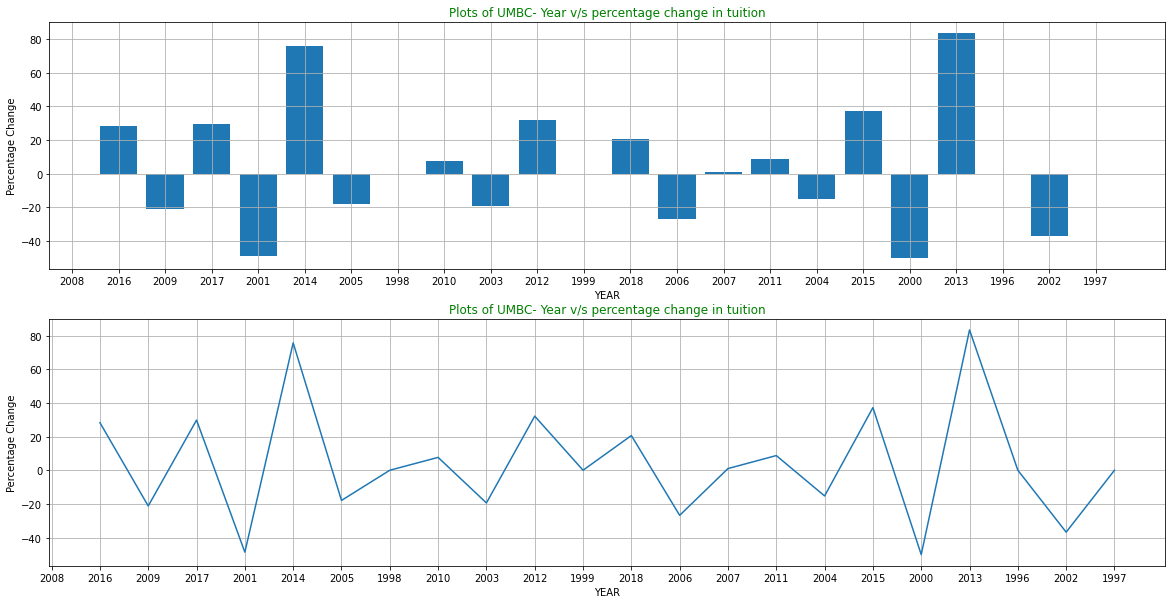

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.grid()
plt.title('Plots of UMBC- Year v/s percentage change in tuition', color='green')
plt.bar(x='YEAR', height='PCT_CHANGE', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')
plt.subplot(2,1,2)
plt.grid()
plt.title('Plots of UMBC- Year v/s percentage change in tuition', color='green')
plt.plot('YEAR', 'PCT_CHANGE', data=umbc_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')

In [27]:
def calculate_percent_change(any_list):
    """
    This function takes list as argument and
    returns llist with percentage changes
    """
    temp = pd.Series(any_list)
    new = temp_Series.pct_change()*100
    new = new.to_list()
    return new

In [28]:
jhu_df = data_conct.loc[data_conct['INSTNM'] == 'Johns Hopkins University'].reset_index(drop=True)
jhu_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,162928,Johns Hopkins University,MD,2.0,0.2609,37700.0,2008
1,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016
2,162928,Johns Hopkins University,MD,2.0,0.2782,39150.0,2009
3,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017
4,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
5,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014
6,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005
7,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
8,162928,Johns Hopkins University,MD,2.0,0.2225,40680.0,2010
9,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003


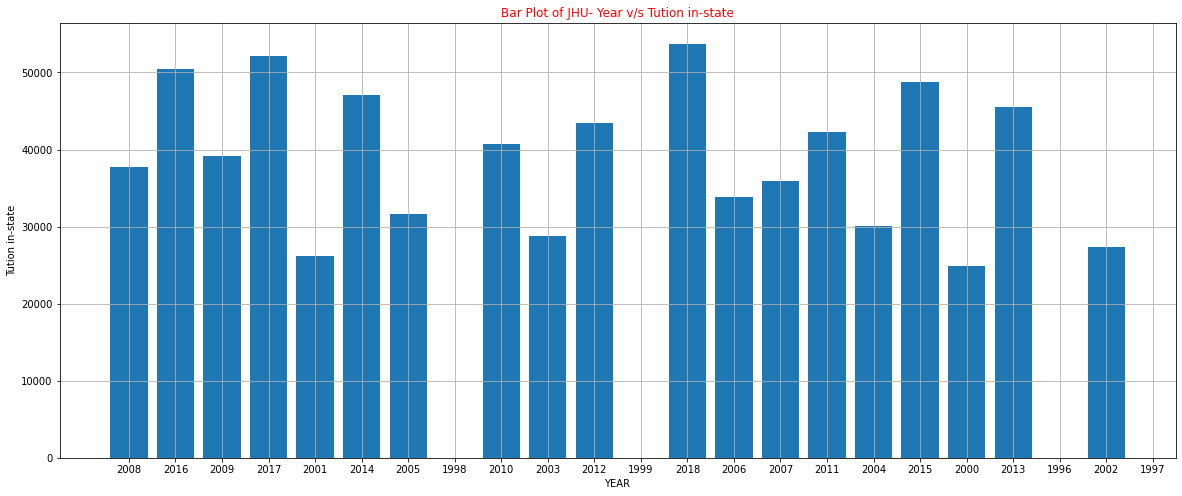

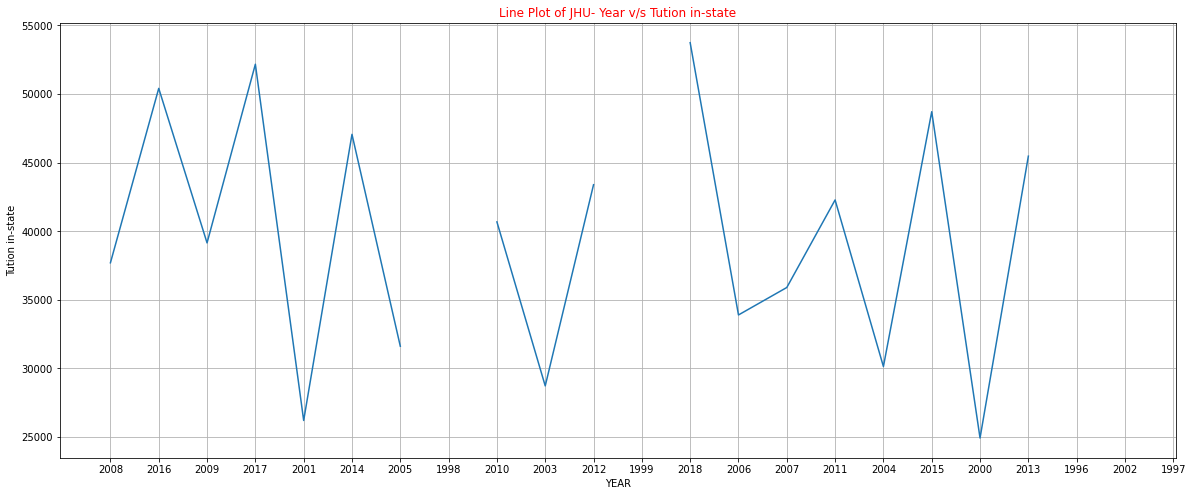

In [29]:
plt.figure(figsize=(20,8))
plt.bar(x='YEAR', height='TUITIONFEE_IN', data=jhu_df)
plt.grid()
plt.title('Bar Plot of JHU- Year v/s Tution in-state', color='red')
plt.xlabel('YEAR')
plt.ylabel('Tution in-state')
plt.figure(figsize=(20,8))
plt.grid()
plt.title('Line Plot of JHU- Year v/s Tution in-state', color='red')
plt.xlabel('YEAR')
plt.ylabel('Tution in-state')
plt.plot('YEAR', 'TUITIONFEE_IN', data=jhu_df)

In [30]:
jhu_list = jhu_df['TUITIONFEE_IN'].to_list()
# Using the function created above to get the percentage changes of JHU data
jhu_percent_change_list = calculate_percent_change(jhu_list)
jhu_formatted_list = [round(i, 2) for i in jhu_percent_change_list ]
jhu_formatted_list # List with percentage changes of jhu tuition fees over years

[nan,
 28.29,
 -21.24,
 29.82,
 -48.69,
 75.7,
 -17.95,
 0.0,
 7.64,
 -19.44,
 32.16,
 0.0,
 20.63,
 -26.8,
 1.0,
 8.72,
 -15.28,
 37.23,
 -50.12,
 83.39,
 0.0,
 -36.81,
 0.0]

In [31]:
jhu_df['PCT_CHANGE'] = jhu_formatted_list
jhu_df # added the above list to jhu dataframe

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
0,162928,Johns Hopkins University,MD,2.0,0.2609,37700.0,2008,NaN
1,162928,Johns Hopkins University,MD,2.0,0.1284,50410.0,2016,28.29
2,162928,Johns Hopkins University,MD,2.0,0.2782,39150.0,2009,-21.24
3,162928,Johns Hopkins University,MD,2.0,0.1254,52170.0,2017,29.82
4,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,-48.69
5,162928,Johns Hopkins University,MD,2.0,0.1608,47060.0,2014,75.70
6,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,-17.95
7,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,0.00
8,162928,Johns Hopkins University,MD,2.0,0.2225,40680.0,2010,7.64
9,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,-19.44


Text(0, 0.5, 'Percentage Change')

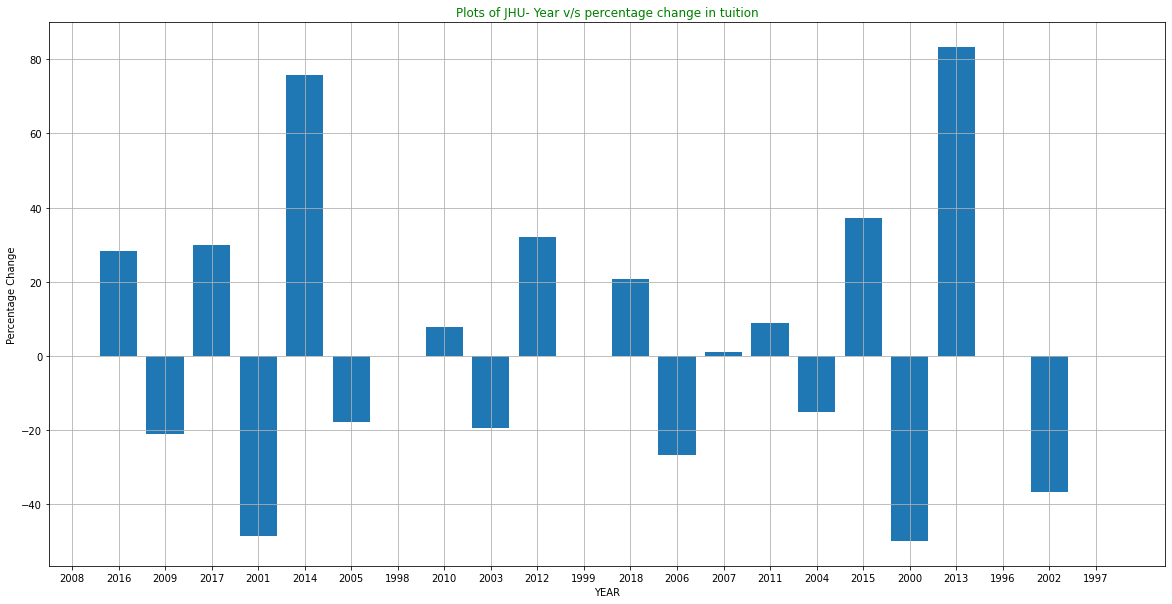

In [32]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Plots of JHU- Year v/s percentage change in tuition', color='green')
plt.bar(x='YEAR', height='PCT_CHANGE', data=jhu_df)
plt.xlabel('YEAR')
plt.ylabel('Percentage Change')

In [33]:
umbc2 = umbc_df[['YEAR', 'PCT_CHANGE']]
umbc2 = umbc2.rename(columns = {"PCT_CHANGE":"UMBC_PCT"}).reset_index(drop=True)# Renaming column
umbc2

,YEAR,UMBC_PCT
0,2008,NaN
1,2016,28.29
2,2009,-21.24
3,2017,29.82
4,2001,-48.69
5,2014,75.70
6,2005,-17.95
7,1998,0.00
8,2010,7.64
9,2003,-19.44


In [34]:
jhu2 = jhu_df[['YEAR', 'PCT_CHANGE']]
jhu2 = jhu2.rename(columns = {"PCT_CHANGE":"JHU_PCT"}).reset_index(drop=True) # Renaming column
jhu2

,YEAR,JHU_PCT
0,2008,NaN
1,2016,28.29
2,2009,-21.24
3,2017,29.82
4,2001,-48.69
5,2014,75.70
6,2005,-17.95
7,1998,0.00
8,2010,7.64
9,2003,-19.44


In [35]:
merged_df = pd.merge(umbc2,jhu2) # Merging two dataframe to one
merged_df

,YEAR,UMBC_PCT,JHU_PCT
0,2008,NaN,NaN
1,2016,28.29,28.29
2,2009,-21.24,-21.24
3,2017,29.82,29.82
4,2001,-48.69,-48.69
5,2014,75.70,75.70
6,2005,-17.95,-17.95
7,1998,0.00,0.00
8,2010,7.64,7.64
9,2003,-19.44,-19.44


<AxesSubplot:title={'center':'Bar plot of instate tuition fee of UMBC and JHU percentage change for each year '}, xlabel='YEAR', ylabel='Percentage change'>

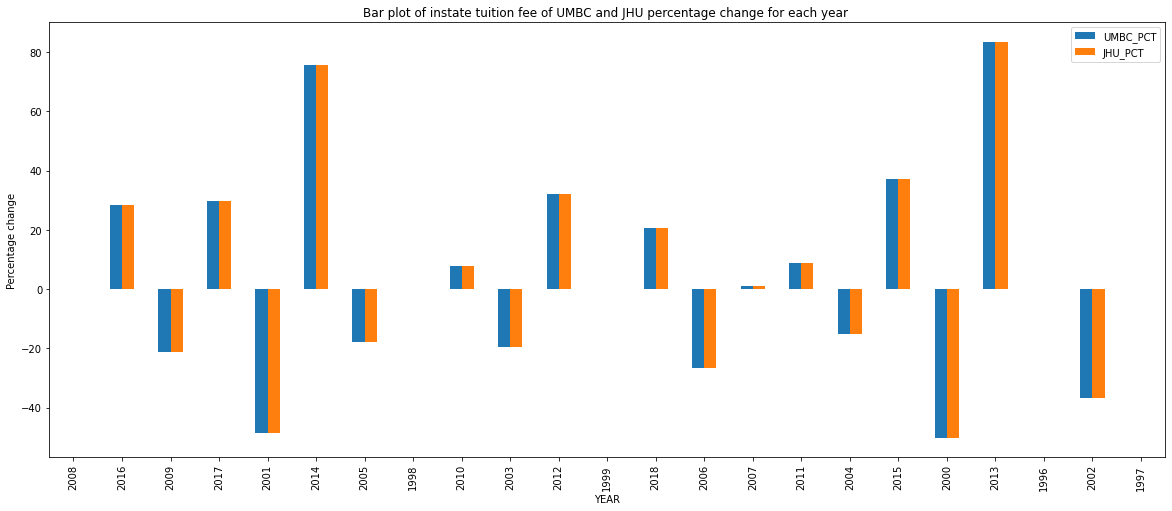

In [36]:
merged_df.plot(x='YEAR', y=['UMBC_PCT', 'JHU_PCT'], kind='bar', figsize=(20,8),
               ylabel='Percentage change',
               title='Bar plot of instate tuition fee of UMBC and JHU percentage change for each year ')

<AxesSubplot:title={'center':'Line plot of instate tuition fee of UMBC and JHU percentage change for each year '}, xlabel='YEAR', ylabel='Percentage change'>

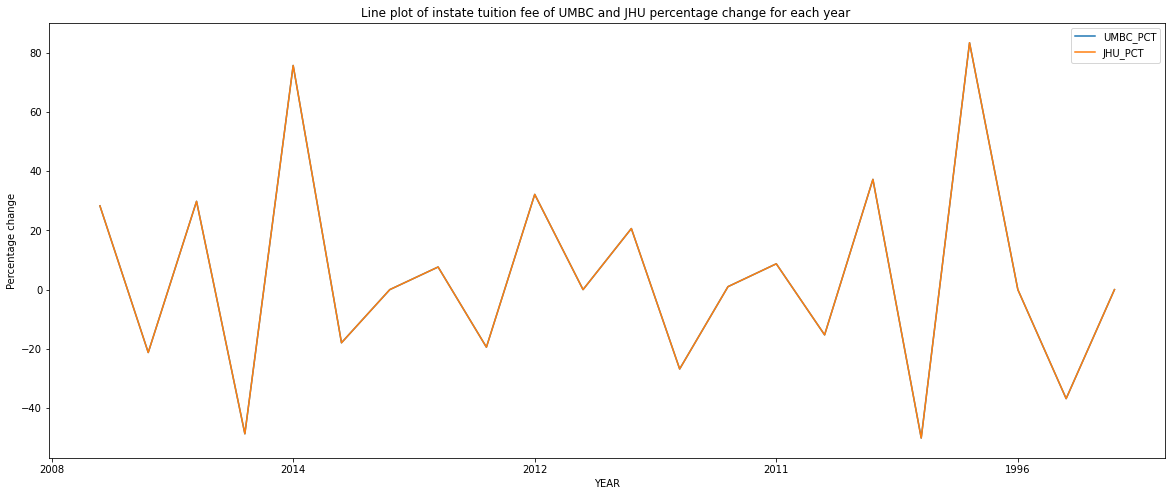

In [37]:
merged_df.plot(x='YEAR', y=['UMBC_PCT', 'JHU_PCT'], figsize=(20,8),
               ylabel='Percentage change',
               title='Line plot of instate tuition fee of UMBC and JHU percentage change for each year ')

From the above plot, the instate tuition fee for the universities UMBC and JHU is same over the years 2001-2008. For the line plot, the percentage change is same.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18807e03-ecfb-4e0c-9a27-6159e281083f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>